## Generated new data set with systematics

In [1]:
from LHEImport.LHEImport import LHEImport as LHEI
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(["science", "grid"])
plt.rcParams.update({"font.family":"serif", "font.size":16, "figure.figsize":[20,10]})

In [2]:
## uncomment this cell to generate the hdf5 files.
data = LHEI('event_files/lhe/ttZ_events_lhapdf_02.lhe')
# data.toHDF5('event_files/hdf5/ttZ_events_02_test', 'particles_limited', limit_events=True)
data.toHDF5('event_files/hdf5/ttZ_events_02', 'particles', limit_events=False)

In [ ]:
# # generating a big list of all data, can then be imported into a pd.DataFrame
# datalist = []
# for i in range(0, len(Data['eventdata'])):
#     event_particles = Data['eventdata'][i]['final_particles']
#     for particle in event_particles:
#         datalist.append(particle.__dict__)

In [ ]:
# df = pd.DataFrame(datalist)

In [3]:
df = pd.read_hdf('event_files/hdf5/ttZ_events_02.h5', 'particles')
df
# df = pd.read_hdf('event_files/hdf5/ttZ_events_02.h5', 'limit_particles')

,barcode,pdgid,status,pt,eta,phi,px,py,pz,energy,mass,pdgid_string,pdgid_latex,parent1,parent2,event_count,spin
0,1,21,-1,0.000000,inf,0.000000,0.000000,0.000000,467.440451,467.440451,0.000,g,g,0,0,0,1.0
1,2,21,-1,0.000000,-inf,0.000000,-0.000000,-0.000000,-387.099943,387.099943,0.000,g,g,0,0,0,-1.0
2,3,6,1,190.901288,-0.818419,0.383857,-177.008824,71.492501,-174.272357,311.035619,173.000,t,t,1,2,0,-1.0
3,4,-6,1,158.863901,1.482395,-0.724676,118.943678,-105.309736,331.738449,406.469110,173.000,t~,\overline{t},1,2,0,1.0
4,5,23,1,67.194989,-0.982114,0.527379,58.065146,33.817234,-77.125584,137.035665,91.188,Z,Z^{0},1,2,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,21,-1,0.000000,inf,0.000000,0.000000,0.000000,472.881646,472.881646,0.000,g,g,0,0,9999,-1.0
49996,2,21,-1,0.000000,-inf,0.000000,-0.000000,-0.000000,-256.745681,256.745681,0.000,g,g,0,0,9999,-1.0
49997,3,6,1,53.358794,-0.379204,-1.482709,4.694140,-53.151914,-20.722301,182.223968,173.000,t,t,1,2,9999,-1.0
49998,4,-6,1,69.324378,2.324121,0.954085,-40.094134,56.553777,350.775432,397.213133,173.000,t~,\overline{t},1,2,9999,-1.0


## Using scikit-hep/vector testing

In [22]:
import vector

## Plot of $p_t$, $\phi$, $\eta$ and Energy for each particle.

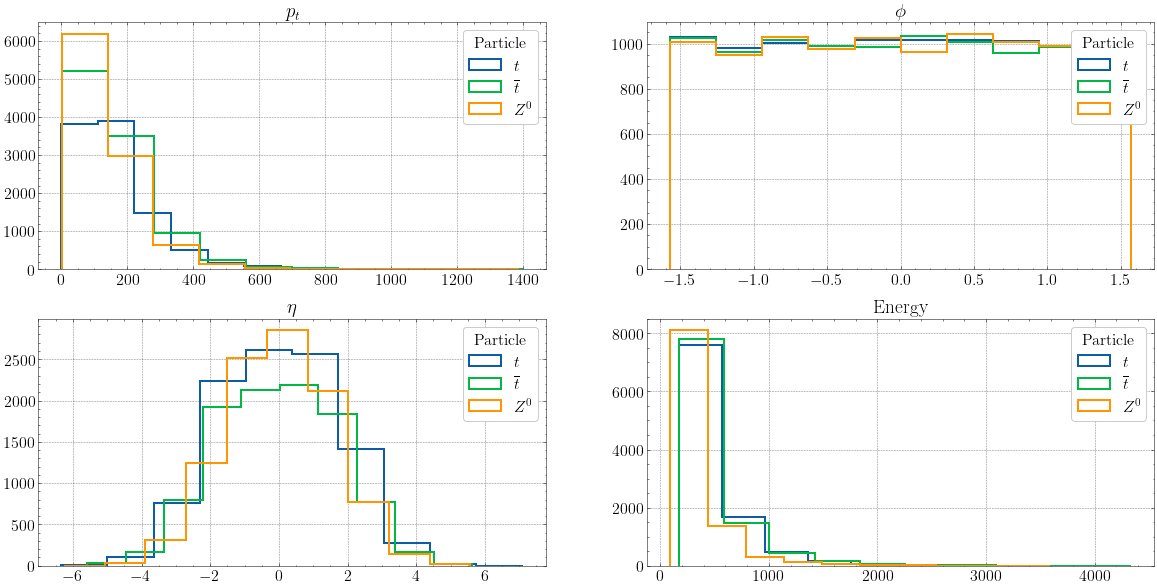

In [25]:
fig, axes = plt.subplots(2,2)
for param, ax in zip(["pt", "phi", "eta", "energy"], axes.flatten()):
    for num in [6,-6,23]:
        particle_string = df[df['pdgid']==num].iloc[0].pdgid_latex
        ax.hist(df[df['pdgid']==num][param], histtype='step', label=f"${particle_string}$", linewidth=2)
        ax.legend(title="Particle", loc="upper right")
        if param == 'energy':
            ax.title.set_text("Energy")
        elif param == 'pt':
            ax.title.set_text("$p_t$")
        else:
            ax.title.set_text(f'$\\{param}$')
plt.show()

#